In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Data Import

## Import

In [3]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from Import.CorpusImporter import CorpusImporter
corpus = CorpusImporter()

In [4]:
corpus.clearMemory()
corpus.crawlNYT(per_tag=335, is_multilabel=False)

Maximum Documents:  3015
Reading archives [/home/retkowski/nltk_data/nyt/2007]:  ['01.tgz', '02.tgz', '03.tgz', '04.tgz', '05.tgz', '06.tgz']
Reading archives [/home/retkowski/nltk_data/nyt/2006]:  ['01.tgz', '02.tgz', '03.tgz', '04.tgz', '05.tgz', '06.tgz', '07.tgz', '08.tgz', '09.tgz', '10.tgz', '11.tgz', '12.tgz']
Reading archives [/home/retkowski/nltk_data/nyt/2005]:  ['01.tgz', '02.tgz', '03.tgz', '04.tgz', '05.tgz', '06.tgz', '07.tgz', '08.tgz', '09.tgz', '10.tgz', '11.tgz', '12.tgz']
Reading archives [/home/retkowski/nltk_data/nyt/2004]:  ['01.tgz', '02.tgz', '03.tgz', '04.tgz', '05.tgz', '06.tgz', '07.tgz', '08.tgz', '09.tgz', '10.tgz', '11.tgz', '12.tgz']
Reading archives [/home/retkowski/nltk_data/nyt/2003]:  ['01.tgz', '02.tgz', '03.tgz', '04.tgz', '05.tgz', '06.tgz', '07.tgz', '08.tgz', '09.tgz', '10.tgz', '11.tgz', '12.tgz']


In [5]:
print(str(len(corpus._Collection)) + " Artikel eingelesen.")

3015 Artikel eingelesen.


In [16]:
corpus._Collection[3].tags

['Sports']

## Show Data Information

In [7]:
def plotFreqDistAsBarChart(fdist,n, title, x, y):
    words = [x[0] for x in fdist.most_common(n)]
    values = [x[1] for x in fdist.most_common(n)]
    matplotlib.style.use('ggplot')
    
    d = {'values': values}
    df = pd.DataFrame(d)


    ax = df.plot(kind='bar',legend=False,title=title)
    ax.set_xticklabels(words)
    ax.set_xlabel(x,fontsize=12)
    ax.set_ylabel(y,fontsize=12)

    plt.show()

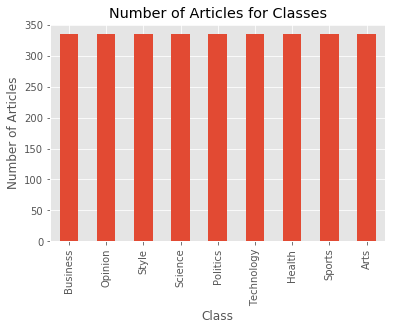

In [8]:
from collections import Counter

tags = [text.tags[0] for text in corpus._Collection]
plotFreqDistAsBarChart(Counter(tags),20,"Number of Articles for Classes", "Class", "Number of Articles")

## Create Data Sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split([news.text for news in corpus._Collection if news.text is not None], [news.tags[0] for news in corpus._Collection if news.text is not None], test_size=0.2, random_state=42)
print(len(X_train), " Newspaper Articles in the Training Set")
print(len(X_test), " Newspaper Articles in the Test Set")

2411  Newspaper Articles in the Training Set
603  Newspaper Articles in the Test Set


## Data Exploration

In [85]:
from Import.LinguisticVectorizer import LinguisticVectorizer
lv = LinguisticVectorizer()
ling_data = lv.transform(X_train)

In [86]:
ling_df = pd.DataFrame(data=ling_data,columns=lv.get_feature_names())
print(ling_df.head())
ling_df.describe().transpose()

   text_length  number_of_paragraphs  average_sent_length  \
0       1459.0                  19.0            23.918033   
1        630.0                   8.0            17.027027   
2        897.0                   5.0            23.605263   
3        539.0                  10.0            17.387097   
4       1007.0                  11.0            20.551020   

   average_word_length  number_of_nouns  number_of_adjectives  \
0             4.915696         0.307745              0.082934   
1             4.806349         0.333333              0.073016   
2             5.014493         0.284281              0.081382   
3             4.957328         0.345083              0.070501   
4             4.861966         0.304866              0.058590   

   number_of_verbs  type_token_relation  concentration_index  hapaxes_index  \
0         0.163125             0.430432             0.286667       0.306374   
1         0.157143             0.522222             0.305000       0.395238   
2    

,count,mean,std,min,25%,50%,75%,max
text_length,2411.0,731.567399,638.027560,2.000000,318.500000,681.000000,977.000000,9861.000000
number_of_paragraphs,2411.0,9.729988,6.462186,2.000000,5.000000,9.000000,12.000000,79.000000
average_sent_length,2411.0,19.851551,6.185523,2.000000,16.827174,19.769231,22.555556,180.666667
average_word_length,2411.0,4.841317,0.291745,3.625000,4.650620,4.837778,5.012012,6.250000
number_of_nouns,2411.0,0.345583,0.080004,0.147541,0.303092,0.329762,0.362666,1.000000
number_of_adjectives,2411.0,0.071597,0.022197,0.000000,0.059752,0.070776,0.083637,0.333333
number_of_verbs,2411.0,0.161906,0.032507,0.000000,0.148712,0.166839,0.182217,0.400000
type_token_relation,2411.0,0.542415,0.118323,0.222932,0.459231,0.513684,0.600197,1.000000
concentration_index,2411.0,0.307962,0.077890,0.186667,0.276667,0.293333,0.313333,1.000000
hapaxes_index,2411.0,0.406268,0.127293,0.129469,0.319882,0.375178,0.456569,1.000000


In [87]:
import math
X_train_pd = pd.DataFrame(X_train)

In [88]:
classes = ["Technology", "Arts", "Opinion", "Science", "Politics", "Sports", "Style", "Health", "Business"]
for kclass in classes:
    Y_train_pd_class = pd.DataFrame(Y_train) == kclass
    classd = [x[0] for x in X_train_pd[Y_train_pd_class].values.tolist() if isinstance(x[0], str)]
    classd_data = lv.transform(classd)
    class_ling_df = pd.DataFrame(data=classd_data,columns=lv.get_feature_names())
    print(kclass)
    print(class_ling_df.describe().transpose())

Technology
                                 count        mean         std        min  \
text_length                      262.0  867.923664  722.137097  18.000000   
number_of_paragraphs             262.0   11.007634    6.130754   2.000000   
average_sent_length              262.0   20.205227    3.880114   7.500000   
average_word_length              262.0    4.839196    0.272946   4.264578   
number_of_nouns                  262.0    0.331164    0.041017   0.230010   
number_of_adjectives             262.0    0.067424    0.015503   0.010753   
number_of_verbs                  262.0    0.175672    0.020459   0.083333   
type_token_relation              262.0    0.515741    0.101804   0.300809   
concentration_index              262.0    0.296911    0.057542   0.206667   
hapaxes_index                    262.0    0.375630    0.102892   0.183353   
action_index                     262.0    0.723371    0.057095   0.538462   
number_of_question_marks         262.0    0.001529    0.003000   

# Building The Pipeline

In [11]:
#%run Import/Preprocessor.py
#%run Import/LinguisticVectorizer.py
#%run Import/NamedEntityVectorizer.py
from Import.Preprocessor import Preprocessor
from Import.LinguisticVectorizer import LinguisticVectorizer
from Import.NamedEntityVectorizer import NamedEntityVectorizer

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
from nltk import PorterStemmer
from nltk import LancasterStemmer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import numpy as np
import re
from collections import Counter

preprocessor = Preprocessor(stopwords = stopwords.words('english'), stemmer = SnowballStemmer("english"))

#[CV] features__ngram_tf_idf__counts__max_features=1868, features__ngram_tf_idf__counts__ngram_range=(1, 3), dim_red__n_components=1788, k_best__k=762 

# max_df = 0.75 for corpus-specific stopwords
cv = CountVectorizer(max_df=0.75, ngram_range=(1,3), max_features=1868, preprocessor=preprocessor.get_preprocessed_text)
tt = TfidfTransformer()
lv = LinguisticVectorizer()
clf = LogisticRegression(verbose=100)
pca = PCA(n_components=1788)

class SelectAtMostKBest(SelectKBest):
    def _check_params(self, X, y):
        print(X.shape)
        if not (self.k == "all" or 0 <= self.k <= X.shape[1]):
            self.k = "all"
            
select = SelectKBest(score_func=f_classif, k=762)

fu = FeatureUnion([
    ('ngram_tf_idf', Pipeline([
      ('counts', cv),
      ('tf_idf', tt)
    ])),
    ('lv', Pipeline([
      ('linguistic', lv)
    ]))
])

pipeline = Pipeline([
  ('features', fu),
  ('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
  ('scaler', StandardScaler(with_mean=True)),
  ('dim_red', pca),
  ('k_best', select),
  ('classifier', clf)
])

# Training of Model

In [95]:
pipeline.fit(X_train, Y_train)

[LibLinear]

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('ngram_tf_idf', Pipeline(steps=[('counts', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.75, max_featu...='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=100, warm_start=False))])

In [96]:
pipeline.score(X_test, Y_test)

0.81094527363184077

# Hypertuning

In [18]:
from sklearn.externals.joblib import Parallel, parallel_backend, register_parallel_backend
import ipyparallel as ipp
from ipyparallel import Client
from ipyparallel.joblib import IPythonParallelBackend
import dill

ipp.register_joblib_backend()

c = Client()
print(c.ids)
bview = c.load_balanced_view()

# this is taken from the ipyparallel source code
register_parallel_backend('ipyparallel', lambda : IPythonParallelBackend(view=bview))

c[:].use_dill()

[0, 1, 2, 3, 4, 5, 6, 7]


<AsyncResult: use_dill>

## Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
       # 'k_best__k': [200,500,800,1000],
        'dim_red__n_components': [100, 500, 900, 1200],
       # 'features__ngram_tf_idf__counts__max_features': [500,800,1000,1200,1400],
        'features__ngram_tf_idf__counts__ngram_range': [(1,1),(1,2),(1,3)]
    }
]

grid = GridSearchCV(pipeline, cv=3, n_jobs=1, param_grid=param_grid, verbose=100, error_score=100)

#with parallel_backend('ipyparallel'):


In [ ]:
grid.fit(X_train, Y_train)

In [49]:
c.clear()

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy

param_dist = {
        'k_best__k': scipy.stats.randint(50, 1500),
        'dim_red__n_components': scipy.stats.randint(1000, 2000),
        'features__ngram_tf_idf__counts__max_features': scipy.stats.randint(1600, 2400),
        'features__ngram_tf_idf__counts__ngram_range': [(1,1),(1,2),(1,3)]
}

randsearch = RandomizedSearchCV(pipeline, cv=3, n_jobs=1, param_distributions=param_dist, verbose=100, error_score=100, n_iter=25)

#with parallel_backend('ipyparallel'):
randsearch.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=1655, dim_red__n_components=1980, k_best__k=1000 


/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:252: FitFailedWarning:

Classifier fit failed. The score on this train-test partition for these parameters will be set to 100.000000. Details: 
ValueError("n_components=1980 must be between 0 and n_features=1674 with svd_solver='full'",)



[CV]  features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=1655, dim_red__n_components=1980, k_best__k=1000, score=100.000000, total=12.4min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.4min remaining:    0.0s
[CV] features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=1655, dim_red__n_components=1980, k_best__k=1000 


/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:252: FitFailedWarning:

Classifier fit failed. The score on this train-test partition for these parameters will be set to 100.000000. Details: 
ValueError("n_components=1980 must be between 0 and n_features=1674 with svd_solver='full'",)



[CV]  features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=1655, dim_red__n_components=1980, k_best__k=1000, score=100.000000, total=12.7min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 25.1min remaining:    0.0s
[CV] features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=1655, dim_red__n_components=1980, k_best__k=1000 


/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:252: FitFailedWarning:

Classifier fit failed. The score on this train-test partition for these parameters will be set to 100.000000. Details: 
ValueError("n_components=1980 must be between 0 and n_features=1674 with svd_solver='full'",)



[CV]  features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=1655, dim_red__n_components=1980, k_best__k=1000, score=100.000000, total=12.5min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 37.6min remaining:    0.0s
[CV] features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=2049, dim_red__n_components=1097, k_best__k=1295 


/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:252: FitFailedWarning:

Classifier fit failed. The score on this train-test partition for these parameters will be set to 100.000000. Details: 
ValueError("k should be >=0, <= n_features; got 1295.Use k='all' to return all features.",)



[CV]  features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=2049, dim_red__n_components=1097, k_best__k=1295, score=100.000000, total=12.5min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 50.1min remaining:    0.0s
[CV] features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=2049, dim_red__n_components=1097, k_best__k=1295 


/opt/conda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:252: FitFailedWarning:

Classifier fit failed. The score on this train-test partition for these parameters will be set to 100.000000. Details: 
ValueError("k should be >=0, <= n_features; got 1295.Use k='all' to return all features.",)



[CV]  features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=2049, dim_red__n_components=1097, k_best__k=1295, score=100.000000, total=12.7min
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 62.8min remaining:    0.0s
[CV] features__ngram_tf_idf__counts__ngram_range=(1, 1), features__ngram_tf_idf__counts__max_features=2049, dim_red__n_components=1097, k_best__k=1295 


In [ ]:
from pandas.tools.plotting import scatter_matrix

#print(map(list, randsearch.cv_results_['params']))

#print(randsearch.cv_results_['params'])
print(randsearch.cv_results_['params'][0])

dfx = pd.DataFrame([i for i in randsearch.cv_results_['params']])
dfx["accuracy"] = randsearch.cv_results_['mean_test_score']
#print(dfx.columns)
dfx.columns = ['n_components', 'max_features', 'n_gram', 'k_best', 'accuracy']
dfx["n_gram_min"], dfx["n_gram_max"] = zip(*dfx.n_gram) #dfx.ix[:, ['n_gram']]
print(dfx.sort_values(by="accuracy"))

scatter_matrix(dfx, diagonal='hist', c=dfx['accuracy'])
plt.show()

# Dimension Reduction

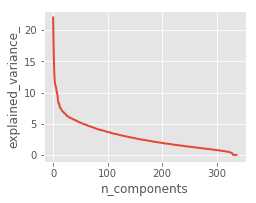

In [99]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

In [13]:
%run Import/FeatureAnalyzer.py
import plotly
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

xx = pipeline.fit_transform(X_train, Y_train)

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    
    data = []

    for topic in list(set(Y_train)):
        data.append(
            Scatter(
                x = [x[0] for i, x in enumerate(X, 0) if topic == Y_train[i]],
                y = [x[1] for i, x in enumerate(X, 0) if topic == Y_train[i]],
                mode ="markers",
                name = topic)
        )
        layout = Layout(
            showlegend = True,
            title=title,
            xaxis = dict(
                title='Component 1',
            ),
            yaxis = dict(
                title='Component 2',
            ),
            hovermode = 'closest'
        )    

    fig = Figure(data=data, layout=layout)

    offline.iplot(fig)


print("Computing PCA projection")
t0 = time()
X_pca = decomposition.PCA(n_components=2).fit_transform(xx)
plot_embedding(X_pca,
               "Principal Components Projection of the Texts (Time %.2fs)" %
               (time() - t0))

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='random',
                     perplexity = 30, learning_rate = 40,
                     n_iter = 5000, n_iter_without_progress = 200)
t0 = time()

#X_reduced = decomposition.PCA(n_components=50, random_state=0).fit_transform(xx)
X_tsne = tsne.fit_transform(xx)

plot_embedding(X_tsne,
               "t-SNE Embedding of the Texts (Time %.2fs)" %
               (time() - t0))

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca',
                     perplexity = 30, learning_rate = 300,
                     n_iter = 5000, n_iter_without_progress = 200)
t0 = time()

#X_reduced = decomposition.PCA(n_components=50, random_state=0).fit_transform(xx)
X_tsne = tsne.fit_transform(xx)

plot_embedding(X_tsne,
               "t-SNE Embedding of the Texts (Time %.2fs)" %
               (time() - t0))

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='random',
                     perplexity = 30, learning_rate = 300,
                     n_iter = 5000, n_iter_without_progress = 200)
t0 = time()

###

X_reduced = decomposition.PCA(n_components=100, random_state=0).fit_transform(xx)
X_tsne = tsne.fit_transform(X_reduced)

plot_embedding(X_tsne,
               "t-SNE Embedding of the Texts (Time %.2fs)" %
               (time() - t0))

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='random',
                     perplexity = 30, learning_rate = 300,
                     n_iter = 5000, n_iter_without_progress = 200)
t0 = time()



#X_reduced = decomposition.PCA(n_components=50, random_state=0).fit_transform(xx)
X_tsne = tsne.fit_transform(xx)

plot_embedding(X_tsne,
               "t-SNE Embedding of the Texts (Time %.2fs)" %
               (time() - t0))


# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca',
                     perplexity = 30, learning_rate = 40,
                     n_iter = 5000, n_iter_without_progress = 200)
t0 = time()

#X_reduced = decomposition.PCA(n_components=50, random_state=0).fit_transform(xx)
X_tsne = tsne.fit_transform(xx)

plot_embedding(X_tsne,
               "t-SNE Embedding of the Texts (Time %.2fs)" %
               (time() - t0))

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca',
                     perplexity = 30, learning_rate = 40,
                     n_iter = 5000, n_iter_without_progress = 200)
t0 = time()

X_reduced = decomposition.PCA(n_components=50, random_state=0).fit_transform(xx)
X_tsne = tsne.fit_transform(X_reduced)

plot_embedding(X_tsne,
               "t-SNE Embedding of the Texts (Time %.2fs)" %
               (time() - t0))

plt.show()


[LibLinear]Computing PCA projection


/opt/conda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning:

Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.



Computing t-SNE embedding


Computing t-SNE embedding


Computing t-SNE embedding


Computing t-SNE embedding


Computing t-SNE embedding


Computing t-SNE embedding


# Feature Selection

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(fu.fit_transform(X_train), Y_train)

/opt/conda/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning:

Features [0] are constant.

/opt/conda/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning:

invalid value encountered in true_divide



In [15]:
scores_df = pd.DataFrame(data=[fit.scores_],columns=np.concatenate((cv.get_feature_names(), lv.get_feature_names())))
pd.set_option('display.max_rows', None)
scores_df.transpose().sort_values(by=[0], ascending=False)

,0
game,205.906160
season,190.532474
team,141.420670
coach,117.190459
health,109.167603
iraq,103.985587
compani,96.783199
player,93.081496
play,89.556028
editor,87.587179


# Evaluation

In [95]:
%run "Import/Evaluation.py"

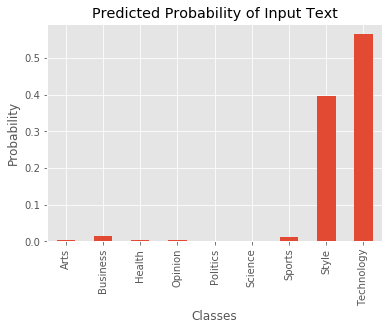

In [98]:
evaluation = Evaluation()
evaluation.print_probabilites(pipeline=pipeline, text="Internet does not like the climate change.")

In [36]:
import pickle
with open('grid_pre.pickle', 'wb') as fp:
    pickle.dump(grid, fp)